Logistic Regression Training...

Decision Tree Training...

Random Forest Training...

SGD Training...

Logistic Regression:
Score:  0.8117619047619048 
Best Param:  {'logisticregression__C': 10.0, 'logisticregression__solver': 'lbfgs'} 
Decision Tree:
Score:  0.8204761904761906 
Best Param:  {'decisiontreeclassifier__max_depth': 5} 
Random Forest:
Score:  0.8198571428571428 
Best Param:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 30} 
SGD:
Score:  0.8119047619047619 
Best Param:  {'sgdclassifier__eta0': 1.0, 'sgdclassifier__learning_rate': 'invscaling'}


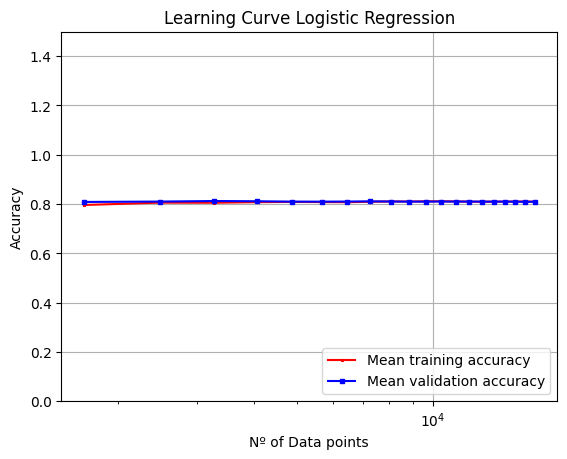

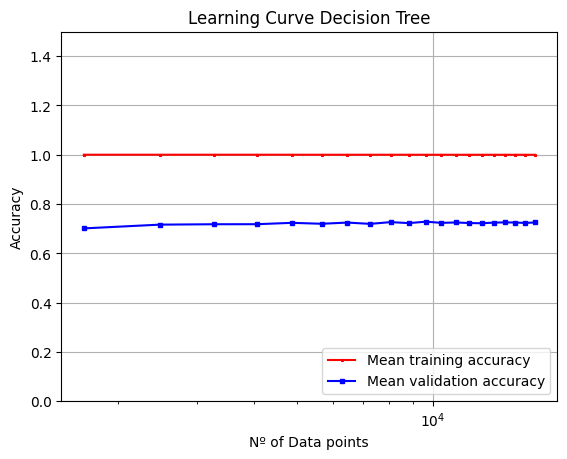

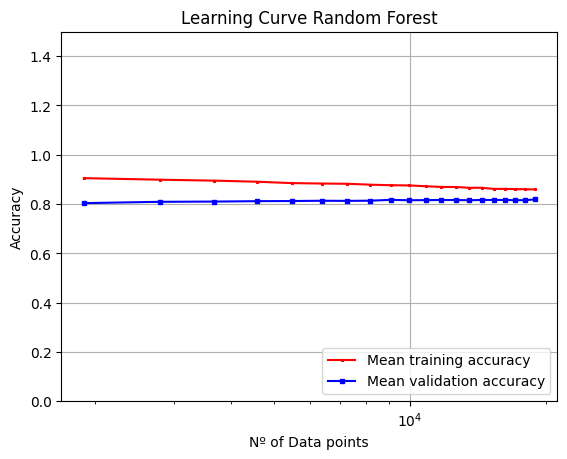

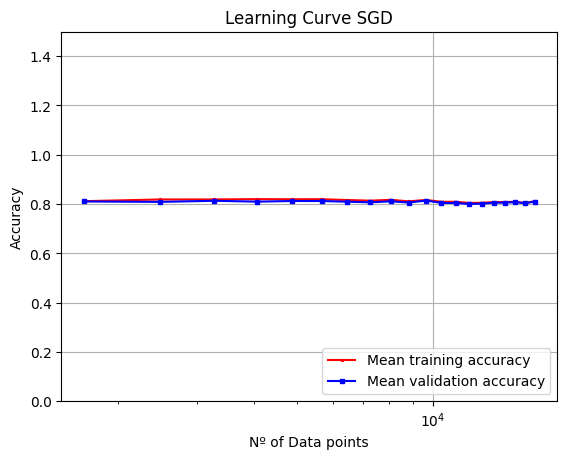

Scores: 
LR: 0.8103333333333333 
DT: 0.8205238095238095 
RF: 0.834047619047619 
SGD: 0.8071428571428572


In [3]:
def model_learning_curve (estimator, X, y, n_splits, name):
    '''
        Plots the learning curve for the given classifier, using a k-fold cross validation
        with n_splits.

        Inputs:
            estimator: scikit-learn classifier
            X, y: dataset
            n_splits: # of folders for k-fold cross validation
            name: str: name of the classifier, to use in saving figure
    '''
    import matplotlib.pyplot as plt
    from sklearn.model_selection import learning_curve

    n_examples, train_scores, test_scores = learning_curve(estimator = estimator,
                                                                X = X,
                                                                y = y,
                                                                train_sizes = np.linspace(0.1,1.0,20),
                                                                cv = n_splits)


    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(n_examples, train_mean,
                        color='red', marker='*',
                        markersize = 2, label='Mean training accuracy')

    plt.plot(n_examples, test_mean,
                color='blue', marker='s', 
                markersize = 3, label='Mean validation accuracy',)

    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel('Nº of Data points')
    plt.title('Learning Curve '+name)
    plt.ylim([0.0, 1.5])
    plt.ylabel('Accuracy')
    plt.savefig('LearningCurve '+name+'test.png')
    plt.show()

## 1. Loading modules 

# Preprocessing and splitting modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (
train_test_split, KFold, GridSearchCV, StratifiedShuffleSplit)

# Learnign Algorithms Modules
from sklearn.linear_model import (
LogisticRegression, SGDClassifier, SGDRegressor)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline


import pandas as pd
import numpy as np


## 2. Loading and Splitting Data 
# Folder path
path =  "../data/"

# Which values are considered NaN
na_vls = ['#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', 
               '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 
                'null', '...']


# Load datasets
df_credit = pd.read_csv(path+"UCI_Credit_Card.csv", na_values = na_vls)

# Handling missing values
df_credit.dropna(inplace=True, how = 'all')
df_credit.fillna(value = '', inplace=True)

# Types for each DataFrame column
crdt_types = {'ID': 'int64',
            'LIMIT_BAL':  'float64',
            'SEX': 'int64',
            'EDUCATION': 'int64',
            'MARRIAGE': 'int64',
            'AGE': 'int64',
            'PAY_0':'int64',
            'PAY_2':'int64',
            'PAY_3':'int64',
            'PAY_4':'int64',
            'PAY_5':'int64',
            'PAY_6':'int64',
            'BILL_AMT1': 'int64',
            'BILL_AMT2': 'int64',
            'BILL_AMT3': 'int64',
            'BILL_AMT4':'int64',
            'BILL_AMT5': 'int64',
            'BILL_AMT6': 'int64',
            'PAY_AMT1': 'int64',
            'PAY_AMT2': 'int64',
            'PAY_AMT3': 'int64',
            'PAY_AMT4':'int64',
            'PAY_AMT5': 'int64',
            'PAY_AMT6': 'int64',
            'default.payment.next.month': 'int64'}

# Casting DataFrames columns according to the types above
df_credit = df_credit.astype(crdt_types)
X = df_credit[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
            'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
            'BILL_AMT1','BILL_AMT2','BILL_AMT3',
            'BILL_AMT4','BILL_AMT5','BILL_AMT6',
            'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
            'PAY_AMT5','PAY_AMT6']].values
y = df_credit['default.payment.next.month'].values

# Dataset dimensions:
n_data, n_features = X.shape

# Model Selection and Validation Parameters
n_splits = 5   # --> # of folders for K-Fold Cross Validation step
random_state = 42

# Splitting and Standardization of training and test datasets
std = StandardScaler()

# Train test splitting
test_size = 0.30
train_size = 0.70

# Stratified data splitting into Train Dataset and Test Dataset
sss = StratifiedShuffleSplit(n_splits = 2, test_size = test_size, random_state=random_state)
train_index,test_index = sss.split(X, y)

X_train = X[train_index[0]]
y_train = y[train_index[0]]
X_test = X[test_index[0]]
y_test = y[test_index[0]]

# Data Standardization
X_train_std = std.fit_transform(X_train, y_train)
X_test_std = std.fit_transform(X_test, y_test)

## 3. Chosen estimators
LR_estimator = make_pipeline(StandardScaler(), LogisticRegression(
                    max_iter = 10000,
                    random_state=random_state,))
'''SVC_estimator =  make_pipeline(StandardScaler(), SVC())'''
DT_estimator =   make_pipeline(StandardScaler(), DecisionTreeClassifier())
RF_estimator =  make_pipeline(StandardScaler(), RandomForestClassifier())
SGD_estimator = make_pipeline(StandardScaler(), SGDClassifier())

# Grids for the estimators
param = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Logistic Regression
solvers = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
lr_grid = [{'logisticregression__solver': solvers, 'logisticregression__C':param[0:6]}]

# SVM
'''svc_grid = [{'svc__C': param, 'svc__kernel': ['linear']},
{'svc__C': param, 'svc__gamma': param, 'svc__kernel': ['rbf']},
{'svc__C': param, 'svc__kernel': ['poly'], 'svc__degree': [1,2,3]}]'''

# Decision Tree and Random Forest
max_depth = [5, 10, 15, 20, 25, 30]
n_estimators = [5, 10, 15, 20, 25, 30]
dt_grid = [{'decisiontreeclassifier__max_depth': max_depth}]
rf_grid = {'randomforestclassifier__max_depth': max_depth, 
        'randomforestclassifier__n_estimators':n_estimators}

#SGD parameters
sgd_grid = {'sgdclassifier__learning_rate':['constant', 
            'optimal','invscaling', 'adaptive'], 
            'sgdclassifier__eta0':param[0:5]}


## 4. Logistic Regression Validation
print("Logistic Regression Training...\n")
lr_gs = GridSearchCV(estimator = LR_estimator,
                    param_grid = lr_grid,
                    scoring = 'accuracy',
                    cv = n_splits)

lr_gs = lr_gs.fit(X_train_std,y_train)
    
## 5. Support Vector Machine Validation
#print("SVM Training...\n")
#svc_gs = GridSearchCV(estimator = SVC_estimator,
#                        param_grid = svc_grid,
#                        scoring = 'accuracy',
#                        cv = n_splits)

#svc_gs = svc_gs.fit(X_train_std, y_train)

## 6. Decision Tree Validation
print("Decision Tree Training...\n")
dt_gs = GridSearchCV(DT_estimator,
                    param_grid = dt_grid, 
                    scoring ='accuracy',
                    cv = n_splits)
dt_gs = dt_gs.fit(X_train_std, y_train)        

## 7. Random Forest Validation
print("Random Forest Training...\n")
rf_gs = GridSearchCV(estimator = RF_estimator,
                    param_grid = rf_grid, 
                    scoring = 'accuracy',
                    cv = n_splits)
rf_gs = rf_gs.fit(X_train_std, y_train)

## 7. SGD Validation
print("SGD Training...\n")
sgd_gs = GridSearchCV(estimator = SGD_estimator,
                    param_grid = sgd_grid, 
                    scoring = 'accuracy',
                    cv = n_splits)
sgd_gs = sgd_gs.fit(X_train_std, y_train)

## 8. Classifier and hyperparameters choice
print("Logistic Regression:\nScore: ", lr_gs.best_score_,"\nBest Param: ", lr_gs.best_params_,
#"\nSupport Vector Machine:\nScore: ", svc_gs.best_score_, "\nBest Param: ", svc_gs.best_params_,
"\nDecision Tree:\nScore: ", dt_gs.best_score_, "\nBest Param: ", dt_gs.best_params_,
"\nRandom Forest:\nScore: ", rf_gs.best_score_, "\nBest Param: ", rf_gs.best_params_,
"\nSGD:\nScore: ", sgd_gs.best_score_, "\nBest Param: ", sgd_gs.best_params_)

## 9. Final Accuracy
LR_estimator = lr_gs.best_estimator_
model_learning_curve(LR_estimator, X_test_std, y_test, 
                    n_splits,
                    'Logistic Regression')

#SVC_estimator = svc_gs.best_estimator_
#model_learning_curve(SVC_estimator, X_test_std, y_test, 
#                     n_splits,'SVM')

dt_estimator = dt_gs.best_estimator_
model_learning_curve(DT_estimator, X_test_std, y_test,
                    n_splits, 
                    'Decision Tree')   

RF_estimator = rf_gs.best_estimator_
model_learning_curve(RF_estimator, X_test_std, y_test, 10, 'Random Forest')
                        
SGD_estimator = sgd_gs.best_estimator_
model_learning_curve(SGD_estimator, X_train_std, y_train, n_splits, 'SGD')


print('Scores:',
'\nLR:', LR_estimator.score(X_test_std, y_test), 
#'\nSVM:', SVC_estimator.score(X_test_std, y_test), 
'\nDT:', dt_estimator.score(X_test_std, y_test),  
'\nRF:', RF_estimator.score(X_test_std, y_test),
'\nSGD:', SGD_estimator.score(X_test_std, y_test))